<h1><center>Boston House Prices</center></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Boston_-_panoramio_%2823%29.jpg" style="width: 750px;"/>

   ### Introduction

The aim of this project is to analyse the Boston House Prices dataset from the UCI Machine Learning Repository, by firstly using descriptive statistics and plots to describe the Boston House Prices, secondly using inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t and lastly to create a neural network that can predict the median house price based on the other variables in the dataset. 

The Boston Housing Dataset consists of price of houses in various places in Boston. The dataset also includes information on Crime (CRIM), average number of rooms per dwelling (RM), the age of people who own the house (AGE), neighborhoods with more lower class workers (LSTAT) and there are many other variable which can be seen below.This data was collected in 1978 and consists of only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


### DATA

There are 14 attributes in each case of the dataset. These are:

1. CRIM - per capita crime rate by town
2.  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS - proportion of non-retail business acres per town.
4.  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.  NOX - nitric oxides concentration (parts per 10 million)
6.  RM - average number of rooms per dwelling
7.  AGE - proportion of owner-occupied units built prior to 1940
8.  DIS - weighted distances to five Boston employment centres
9.  RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \\$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's



### Download Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magic line in plt
%matplotlib inline

# Read dataset from file 
boston = pd.read_csv("HousingData.csv")

# Preview the first 5 lines of the loaded data 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
# run a summary statistics rounding to four deciaml place
boston.describe(include = 'all').round(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.0000,486.0000,486.0000,486.0000,506.0000,506.0000,486.0000,506.0000,506.0000,506.0000,506.0000,506.0000,486.0000,506.0000
mean,3.6119,11.2119,11.0840,0.0700,0.5547,6.2846,68.5185,3.7950,9.5494,408.2372,18.4555,356.6740,12.7154,22.5328
std,8.7202,23.3889,6.8359,0.2553,0.1159,0.7026,27.9995,2.1057,8.7073,168.5371,2.1649,91.2949,7.1559,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0819,0.0000,5.1900,0.0000,0.4490,5.8855,45.1750,2.1002,4.0000,279.0000,17.4000,375.3775,7.1250,17.0250
50%,0.2537,0.0000,9.6900,0.0000,0.5380,6.2085,76.8000,3.2074,5.0000,330.0000,19.0500,391.4400,11.4300,21.2000
75%,3.5603,12.5000,18.1000,0.0000,0.6240,6.6235,93.9750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


The above table gives us a summary of the dataset based on the variables The result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median [11]. The count index excludes 'NA' for a number of columns. The average house price in 1978 was \\$22,500 while min mean value was \\$5,000 with max mean value of \\$50,000.

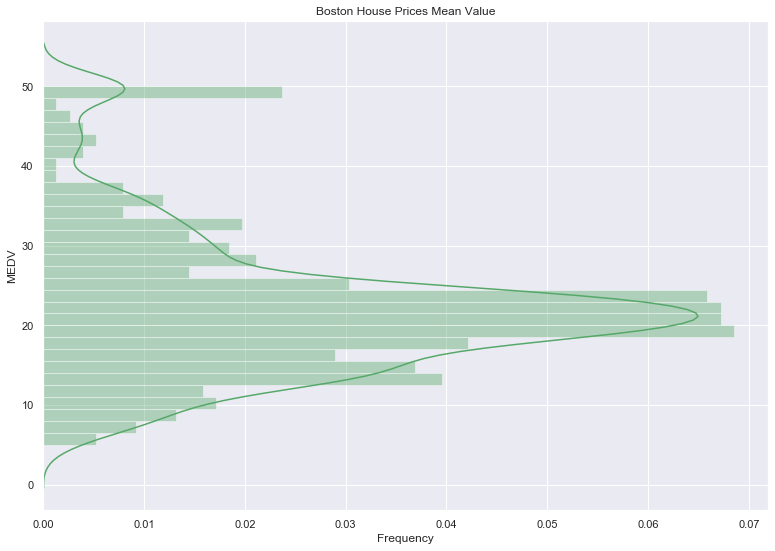

In [43]:
# Use seaborn to create a plot
# use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a displot to show the 'MEDV'
sns.distplot(boston['MEDV'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices Mean Value")       

# X -axis description
plt.xlabel("Frequency")

plt.show()

As we can see from the plot above, the majority of the prices are around the \\$20,000 mark with a few outliners in the min and max values.

Next, we will create a correlation matrix. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data usig the seaborn library [12]. The correlation coefficient ranges from -1 to 1. If the value is close to 1, this indicates there is a strong relationship between these two variables an the opposite can be said about if the value is closer to - 1. 

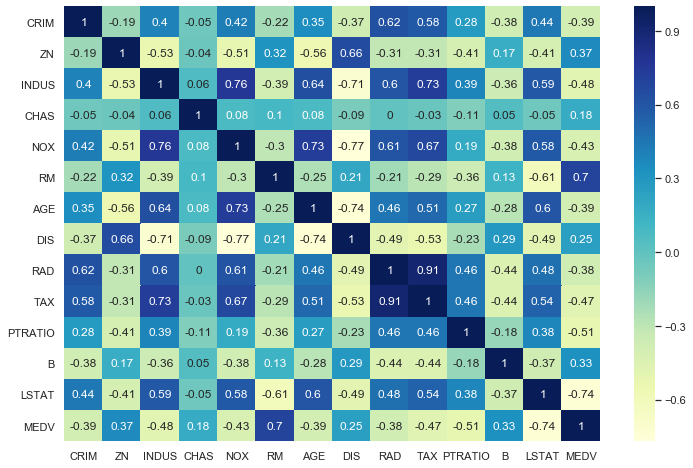

In [67]:
# create a matrix to show the interaction between variables. Round data to 2 deciaml places
correlation_matrix = boston.corr().round(2)

# Use annot to input data into square wtth color "YlGnBu"
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu")

# Re-sizr the matrix
sns.set(rc={'figure.figsize':(15,8)})

From the matrix correlation, the number of room per dwelling 'RM' has the biggest positive impact on the price of a house at 0.70. Other's that have a positive impact price include 'ZN' (proportion of residential land zoned for lots over 25,000 sq.ft.) at 0.37, 'CHAS' (Charles River dummy variable) at 0.18 and 'B' (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) at 0.33.

If you look at the negative impact of the price in the matrix, 'LSTAT' (LSTAT - % lower status of the population) is at -0.74 while 'PTRATIO' is at -0.51.

Let's show these correlations for 'RM' and 'LSTAT' for 'MEDV' by using linear regression. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ('RM', 'LSTAT'), and the other is considered to be a dependent ('MEDV') variable [13]. 

In [ ]:
from sklearn.linear_model import LinearRegression

https://realpython.com/linear-regression-in-python/

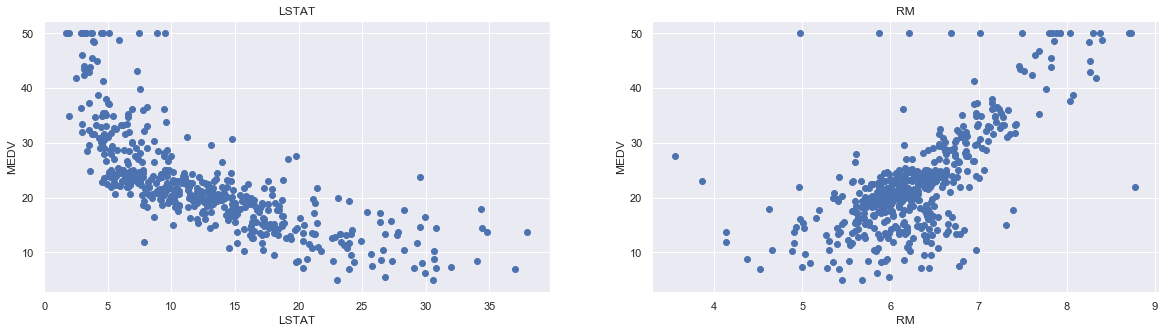

In [23]:
plt.figure(figsize=(20, 5))

features = ['RM', 'LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Feature Observation
Data Science is the process of making some assumptions and hypothesis on the data, and testing them by performing some tasks. Initially we could make the following intuitive assumptions for each feature:
Houses with more rooms (higher ‘RM’ value) will worth more. Usually houses with more rooms are bigger and can fit more people, so it is reasonable that they cost more money. They are directly proportional variables.
Neighborhoods with more lower class workers (higher ‘LSTAT’ value) will worth less. If the percentage of lower working class people is higher, it is likely that they have low purchasing power and therefore, they houses will cost less. They are inversely proportional variables.
Neighborhoods with more students to teachers ratio (higher ‘PTRATIO’ value) will be worth less. If the percentage of students to teachers ratio people is higher, it is likely that in the neighborhood there are less schools, this could be because there is less tax income which could be because in that neighborhood people earn less money. If people earn less money it is likely that their houses are worth less. They are inversely proportional variables.
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

### References

1. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

2. https://www.kaggle.com/vikrishnan/boston-house-prices

3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

5. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

6. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

7. https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html?source=post_page---------------------------

8. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

9. https://www.kaggle.com/sagarnildass/predicting-boston-house-prices

10. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

11.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

11. https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

12. https://www.displayr.com/what-is-a-correlation-matrix/

13. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm